# DS 3000 - Practicum 1 (Group 5)
From Xingui Re,
Tayapat Ketvoravit,
Melvin Cheng,
Savir Khanna

#### Explain all steps to ensure that TAs can understand the output from your analysis. 
#### Note: the purpose of this practicum is to tell a story with the data. Ensure that your work is easy to understand.

In [73]:
# Cleaning / preparing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

aviation_df = pd.read_csv(
    "NTSBAviationData.csv", 
    encoding="latin1",
    low_memory=False
)

print(aviation_df.head())
print(aviation_df.info())
print(aviation_df.shape)

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

### (I) Converting to appropriate data types

In [74]:
# Conversion after inspecting data dictionary

# from object to string
aviation_df['Event.Id'] = aviation_df['Event.Id'].astype('string')
aviation_df['Accident.Number'] = aviation_df['Accident.Number'].astype('string')
aviation_df['Location'] = aviation_df['Location'].astype('string')
aviation_df['Country'] = aviation_df['Country'].astype('string')
aviation_df['Airport.Code'] = aviation_df['Airport.Code'].astype('string')
aviation_df['Airport.Name'] = aviation_df['Airport.Name'].astype('string')
aviation_df['Registration.Number'] = aviation_df['Registration.Number'].astype('string')
aviation_df['Make'] = aviation_df['Make'].astype('string')
aviation_df['Model'] = aviation_df['Model'].astype('string')
aviation_df['Air.carrier'] = aviation_df['Air.carrier'].astype('string')

# from object to category because they have a limited set of values
aviation_df['Injury.Severity'] = aviation_df['Injury.Severity'].astype('category')
aviation_df['Investigation.Type'] = aviation_df['Investigation.Type'].astype('category')
aviation_df['Aircraft.damage'] = aviation_df['Aircraft.damage'].astype('category')
aviation_df['Aircraft.Category'] = aviation_df['Aircraft.Category'].astype('category')
aviation_df['Amateur.Built'] = aviation_df['Amateur.Built'].astype('category')
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].astype('category')
aviation_df['FAR.Description'] = aviation_df['FAR.Description'].astype('category')
aviation_df['Schedule'] = aviation_df['Schedule'].astype('category')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].astype('category')
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].astype('category')
aviation_df['Broad.phase.of.flight'] = aviation_df['Broad.phase.of.flight'].astype('category')
aviation_df['Report.Status'] = aviation_df['Report.Status'].astype('category')

# from object to datetime
aviation_df['Event.Date'] = pd.to_datetime(
    aviation_df['Event.Date'], 
    errors='coerce',
    dayfirst=False
)
aviation_df['Publication.Date'] = pd.to_datetime(
    aviation_df['Publication.Date'], 
    errors='coerce',
    dayfirst=True 
)

# from object to float
aviation_df['Latitude'] = pd.to_numeric(aviation_df['Latitude'], errors='coerce')
aviation_df['Longitude'] = pd.to_numeric(aviation_df['Longitude'], errors='coerce')

# from float to int
aviation_df['Number.of.Engines'] = (
    pd.to_numeric(aviation_df['Number.of.Engines'], errors='coerce').astype('Int64')
)
aviation_df['Total.Fatal.Injuries'] = (
    pd.to_numeric(aviation_df['Total.Fatal.Injuries'], errors='coerce').astype('Int64')
)
aviation_df['Total.Serious.Injuries'] = (
    pd.to_numeric(aviation_df['Total.Serious.Injuries'], errors='coerce').astype('Int64')
)
aviation_df['Total.Minor.Injuries'] = (
    pd.to_numeric(aviation_df['Total.Minor.Injuries'], errors='coerce').astype('Int64')
)
aviation_df['Total.Uninjured'] = (
    pd.to_numeric(aviation_df['Total.Uninjured'], errors='coerce').astype('Int64')
)

In [75]:
# Recheck the types to see if they properly updated
print(aviation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  string        
 1   Investigation.Type      88889 non-null  category      
 2   Accident.Number         88889 non-null  string        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  string        
 5   Country                 88663 non-null  string        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            50132 non-null  string        
 9   Airport.Name            52704 non-null  string        
 10  Injury.Severity         87889 non-null  category      
 11  Aircraft.damage         85695 non-null  category      
 12  Aircraft.Category       32287 non-null  catego

### (II) Handling missing values

In [76]:
print("Total missing counts per col:\n", aviation_df.isnull().sum())

Total missing counts per col:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  76903
Longitude                 76915
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publicati

#### Which handling strategy for missing values

We're not going to drop rows with missing values, because some rows necessary for analysis such as Aircraft Category have a significant number of missing values (56602 out of 88889, so around 64%), and we'd lose a lot of valuable data by doing so that could skew our results. So we will instead fill in missing values with appropriate values.

In [77]:
# Fill missing values for categories/strings with "Unknown"
columns_string_unknown = [
    'Location', 'Country', 'Make', 'Model',
    'Registration.Number', 'Airport.Code', 
    'Airport.Name', 'Air.carrier'
]

columns_category_unknown = [
    'Amateur.Built', 'Injury.Severity', 'Aircraft.damage',
    'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
    'Report.Status', 'Aircraft.Category', 'FAR.Description', 
    'Schedule', 'Broad.phase.of.flight'
]

aviation_df[columns_string_unknown] = (
    aviation_df[columns_string_unknown].fillna('Unknown')
)

for col in columns_category_unknown:
    if 'Unknown' not in aviation_df[col].unique():
        aviation_df[col] = aviation_df[col].cat.add_categories('Unknown')
    aviation_df[col] = aviation_df[col].fillna('Unknown')

# printing values to see whether to use mean, median, or mode
columns_numerical = [
    'Number.of.Engines', 'Total.Uninjured', 'Total.Fatal.Injuries',
    'Total.Serious.Injuries', 'Total.Minor.Injuries'
]

for col in columns_numerical:
    print(aviation_df[col].unique())

<IntegerArray>
[1, <NA>, 2, 0, 3, 4, 8, 6]
Length: 8, dtype: Int64
<IntegerArray>
[   0, <NA>,   44,    2,    1,    3,    6,    4,  149,   12,
 ...
  295,  321,  521,  301,  294,  378,  207,  406,  251,  455]
Length: 380, dtype: Int64
<IntegerArray>
[   2,    4,    3,    1, <NA>,    0,    8,   78,    7,    6,
 ...
   58,  162,  150,  224,   62,   66,  112,  188,   41,  176]
Length: 126, dtype: Int64
<IntegerArray>
[   0, <NA>,    2,    1,    6,    4,    5,   10,    3,    8,    9,    7,   15,
   17,   28,   26,   47,   14,   81,   13,  106,   60,   16,   21,   50,   44,
   18,   12,   45,   39,   43,   11,   25,   59,   23,   55,   63,   88,   41,
   34,   53,   33,   67,   35,   20,  137,   19,   27,  125,  161,   22]
Length: 51, dtype: Int64
<IntegerArray>
[   0, <NA>,    1,    3,    2,    4,   24,    6,    5,   25,   17,   19,   33,
   14,    8,   13,   15,    7,    9,   16,   20,   11,   12,   10,   38,   42,
   29,   62,   28,   31,   39,   32,   18,   27,   57,   50,   23,  125,  

In [78]:
# We see that for Number of Engines it seems more categorical, so we
# can use the mode for that. For the rest of the numerical columns,
# there seems to be a lot of variance, so it would be best to use
# the median instead of the mean.

# handling missing values in numerical columns:

mode = aviation_df['Number.of.Engines'].mode()[0]
aviation_df['Number.of.Engines'] = (
    aviation_df['Number.of.Engines'].fillna(mode)
)

for i in range (1, len(columns_numerical)):
    col = columns_numerical[i]
    median_value = aviation_df[col].median()
    aviation_df[col] = aviation_df[col].fillna(median_value)

In [79]:
# checking for missing values again
# Note: will be leaving the missing values in latitude, longitude,
# and Publication date since they won't be used for analysis, and
# have a significant amount of missing values.

# this should show 0 for every column except latitude, longitude,
# and Publication date
print("Total missing counts per col:\n", aviation_df.isnull().sum())

Total missing counts per col:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  76903
Longitude                 76915
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description               0
Schedule                      0
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publicati

### Handling Invalid Data

Now that we've handled missing values, we can deal with handling possibly invalid data.

Note that earlier, we checked for the unique values in numerical columns to see the range of values, and we saw that there were no negative values so we don't need to handle that in this section.

In [80]:
# checking if Event ID's are 14-character alphanumeric values
# according to the data dictionary

invalid_event_ids = (
    aviation_df[(aviation_df['Event.Id'].str.len() != 14) | 
    (~aviation_df['Event.Id'].str.isalnum())]
)

print("Invalid Event IDs due to length or characters:")
print(invalid_event_ids)

Invalid Event IDs due to length or characters:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date]
Index: []

[0 rows x 31 columns]


In [81]:
# checking for invalid dates because the first aircraft
# was invented in 1903, so there shouldn't be
# any records from before 1900

min_date = pd.Timestamp('1900-01-01')

# checking the Event.Date col
invalid_event_dates = aviation_df[aviation_df['Event.Date'] < min_date]
print("Invalid event dates\n:")
print(invalid_event_dates)

# checking the Publication.Date col
invalid_pub_dates = aviation_df[aviation_df['Publication.Date'] < min_date]
print("Invalid publication dates\n:")
print(invalid_pub_dates)

Invalid event dates
:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date]
Index: []

[0 rows x 31 columns]
Invalid publication dates
:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injurie

In [82]:
# checking to make sure this column only contains yes/no/unknown
# and it does based on what is printed out
print(aviation_df['Amateur.Built'].unique())

['No', 'Yes', 'Unknown']
Categories (3, object): ['No', 'Yes', 'Unknown']


### End of preparing data

Now that we took care of invalid values, inappropriate types, and missing values, we should be able to proceed with our analysis! :)

## Question 1: Setting the Baseline - "Where Are We Now?" (15 points)

Create an executive dashboard (i.e. organized visualizations that are informative) showing the current state of aviation safety. Include:
* A line chart showing accidents vs. incidents for the most recent 20 years available in the dataset.
* A proportion chart comparing fatal vs. non-fatal events over time.
* A gauge or KPI card showing the current "safety score" (you define this metric). Ensure that you clearly define the metric and what factors are being considered in your calculation.
  
Insight Goal: Show how aviation safety have evolved. Has it progress or stagnated in any areas? Establish whether safety is improving and identify any concerning trends that need immediate attention. Explain your results.


In [121]:
# Data Prep for Q1
#   Year (from Event.Date)
#   InvestigationTypeNorm (normalized "Accident"/"Incident")
#   FatalEvent (binary flag)
#   WeightedInjury (for KPI)
#   df20 / idx20 / year_window (last 20 years subset)

# 1) Ensure Event.Date exists

# We rely on Event.Date for all time-based charts.
# If the column is missing, it's a hard-stop because the dashboard can't be built.
if "Event.Date" not in aviation_df.columns:
    raise KeyError(
        "Missing column 'Event.Date'. "
        "Your earlier prep should create/parse it. "
        "Without dates, we can't build 20-year trends."
    )


# 2) Guarantee Event.Date is truly datetime *right now*

# Why re-parse here?
#   • Jupyter notebooks are stateful—if you re-ran earlier cells in a different order,
#     Event.Date might have reverted to object/string/category.
#   • The .dt accessor ONLY works on datetime64 dtypes.
# errors='coerce' turns any unparsable strings into NaT (Not-a-Time) instead of crashing.
aviation_df["Event.Date"] = pd.to_datetime(
    aviation_df["Event.Date"],
    errors="coerce"          # invalid dates become NaT so we can safely drop them
)

# visibility to see if anything went wrong with parsing:
print("Event.Date dtype now:", aviation_df["Event.Date"].dtype)
print("Rows with unparseable Event.Date (NaT):", aviation_df["Event.Date"].isna().sum())

# 3) Derive Year from Event.Date (nullable Int64 for safety)

# Why Int64 (nullable) instead of int64?
#   • If a row had NaT for Event.Date, .dt.year returns NaN.
#   • Int64 pandas extension type can hold <NA> values; plain int64 cannot.
aviation_df["Year"] = aviation_df["Event.Date"].dt.year.astype("Int64")

# 4) Normalize Investigation.Type for clean grouping in the line chart

# This column distinguishes "Accident" vs "Incident".
# We title-case and trim to avoid issues like "accident", " ACCIDENT ", etc.
# If the column truly doesn't exist in your extract, we still create a placeholder
# so that code runs (you'll just get zeros for incidents).
if "Investigation.Type" in aviation_df.columns:
    aviation_df["InvestigationTypeNorm"] = (
        aviation_df["Investigation.Type"]
        # cast to string so .str methods are safe
        .astype(str)
        # remove leading/trailing whitespace
        .str.strip()     
        .str.title()  
    )
else:
    aviation_df["InvestigationTypeNorm"] = ""  # keeps downstream groupbys from breaking

# 5) Build FatalEvent flag from your numeric injury columns 

# Earlier prep already converted these to numeric Int64 with missing handled.
# Still check presence to fail fast if columns were renamed or dropped.
needed_injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]
missing_cols = [c for c in needed_injury_cols if c not in aviation_df.columns]
if missing_cols:
    raise KeyError(
        f"Missing expected numeric injury columns: {missing_cols}. "
        "Check the earlier prep cell that casts injury columns."
    )

# Fill NA with 0 for safe arithmetic (Int64 can contain <NA>; math with <NA> propagates NA)
t_fatal   = aviation_df["Total.Fatal.Injuries"].fillna(0)
t_serious = aviation_df["Total.Serious.Injuries"].fillna(0)
t_minor   = aviation_df["Total.Minor.Injuries"].fillna(0)

# FatalEvent is a binary label used by the proportion chart.
# Any row with at least one fatal injury counts as a fatal event.
aviation_df["FatalEvent"] = (t_fatal > 0).astype(int)

# 6) WeightedInjury — single severity score for KPI metric

# We want a scalar that increases with outcome severity.
# Fatalities are far more consequential - weight = 3
# Serious injuries still significant - weight = 1
# Minor injuries less severe - weight = 0.5
# This is a tunable modeling choice that we document in our markdown.
aviation_df["WeightedInjury"] = 3.0 * t_fatal + 1.0 * t_serious + 0.5 * t_minor


# 7) Create a clean DataFrame with valid years only for time operations

# We drop rows where Year is <NA> (i.e., Event.Date could not be parsed).
df_years = aviation_df[aviation_df["Year"].notna()].copy()

# Convert Year from nullable Int64 to plain int for indexing/plotting convenience.
df_years["Year"] = df_years["Year"].astype(int)

# Safety check: if everything was NaT (no valid dates), we cannot proceed.
if df_years.empty:
    raise ValueError(
        "After parsing, there are no valid Event.Date values to compute Year. "
        "Check the input file or earlier parsing rules."
    )

# 8) Compute the 20-year analysis window used by ALL Q1 visuals

# max_year is the latest year present in the dataset (not necessarily the present calendar year).
# year_window is an inclusive list of the 20 most recent years: [max_year-19, ..., max_year].
max_year = int(df_years["Year"].max())
year_window = list(range(max_year - 19, max_year + 1))

# Filter to only those 20 years; this ensures every chart uses the same scope.
df20 = df_years[df_years["Year"].isin(year_window)].copy()

# Build a pandas Index of the years for easy reindexing in plots (fills missing years with 0).
idx20 = pd.Index(year_window, name="Year")


# 9) sanity prints
print(
    f"[Q1 PREP COMPLETE] Window: {year_window[0]}–{year_window[-1]} | "
    f"Rows kept: {len(df20)} | Latest year in data: {max_year}"
)
print("Columns now ready for Q1:", ["Year", "InvestigationTypeNorm", "FatalEvent", "WeightedInjury"])


Event.Date dtype now: datetime64[ns]
Rows with unparseable Event.Date (NaT): 0
[Q1 PREP COMPLETE] Window: 2003–2022 | Rows kept: 34911 | Latest year in data: 2022
Columns now ready for Q1: ['Year', 'InvestigationTypeNorm', 'FatalEvent', 'WeightedInjury']


### Line Chart: showing accidents vs. incidents for the most recent 20 years available in the dataset.

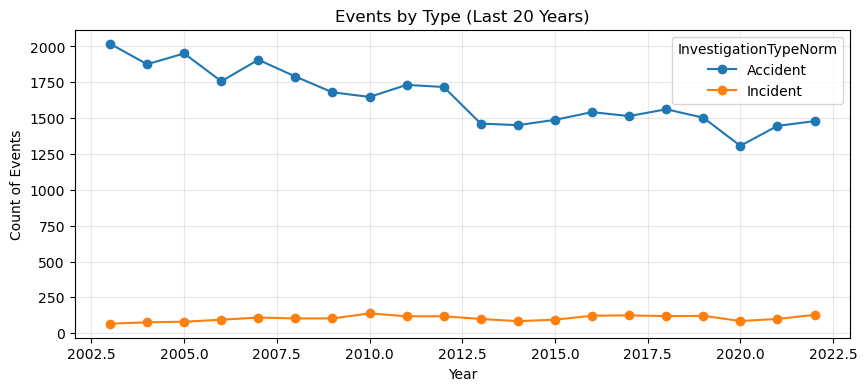

In [123]:
# Group the dataset by Year and InvestigationTypeNorm (Accident/Incident).
# .size() counts how many rows fall into each combination.
# .unstack() pivots the InvestigationTypeNorm values into columns for easier plotting.
# .reindex(idx20) ensures all years in the 20-year window appear, even if some have 0 counts.
counts_by_year_type = (
    df20.groupby(["Year","InvestigationTypeNorm"])
        .size()
        .unstack(fill_value=0)
        .reindex(idx20, fill_value=0)
)

# Plot the line chart.
# Each column (Accident/Incident) will become its own line.
ax = counts_by_year_type.plot(figsize=(10,4), marker="o")
# Chart title
ax.set_title("Events by Type (Last 20 Years)")
# X-axis label
ax.set_xlabel("Year")
# Y-axis label
ax.set_ylabel("Count of Events")
# Add light gridlines for readability
ax.grid(True, alpha=0.3)                        

### A proportion chart comparing fatal vs. non-fatal events over time.

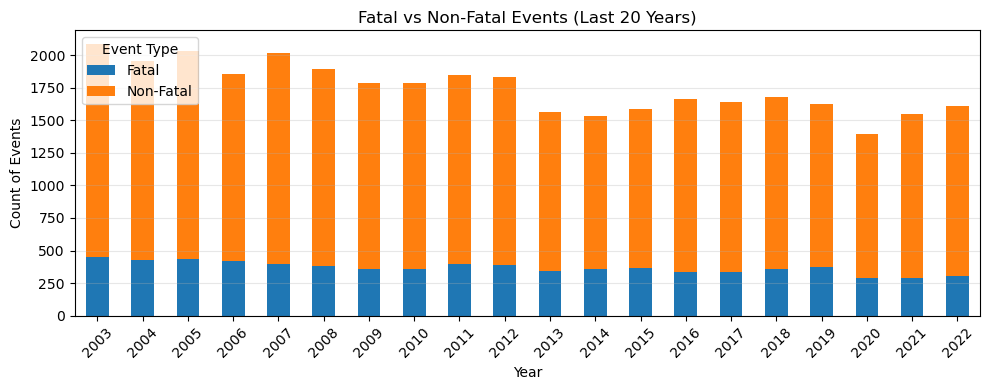

In [124]:
# fatal_by_year:
#   Counts how many fatal events occurred each year.
#   This was already calculated earlier.
#   Each row corresponds to a single year in the 20-year analysis window.
#   Values represent the total number of events in that year with ≥1 fatal injury.
fatal_by_year = (
    df20.groupby("Year")["FatalEvent"].sum()
        .reindex(idx20, fill_value=0)
)

# total_by_year:
# Group by year and count the number of events in each year.
total_by_year = df20.groupby("Year").size()

# Make sure all years in the 20-year window are present.
# If some years have no events, we'll manually fill those with 0.
for year in year_window:
    if year not in total_by_year.index:
        total_by_year.loc[year] = 0

# Sort by year so the plot comes out in chronological order.
total_by_year = total_by_year.sort_index()

# fatal_nonfatal DataFrame:
#   Construct a 2-column DataFrame where:
#   - "Fatal" holds the yearly counts of fatal events
#   - "Non-Fatal" is simply total events minus fatal events
#   .fillna(0) ensures there are no NaNs left after subtraction.
fatal_nonfatal = pd.DataFrame({
    "Fatal": fatal_by_year,
    "Non-Fatal": (total_by_year - fatal_by_year)
}).fillna(0)

# Plotting:
#   We use a stacked bar chart (kind="bar", stacked=True)
#   Each bar represents a single year.
#   The bar is split into two stacked segments:
#       • bottom = Fatal events
#       • top = Non-Fatal events
#   This makes it easy to compare both absolute and relative volumes year-to-year.
ax = fatal_nonfatal.plot(
    kind="bar",           # bar chart
    stacked=True,         # stack fatal + non-fatal on top of each other
    figsize=(10, 4)       # set figure size for readability
)

# Chart formatting:
ax.set_title("Fatal vs Non-Fatal Events (Last 20 Years)")
ax.set_xlabel("Year")                                     
ax.set_ylabel("Count of Events")                 

# Rotate x-axis tick labels for better readability if there are many years.
plt.xticks(rotation=45)

# Add a grid to make values easier to read visually.
ax.grid(axis="y", alpha=0.3)

# Add legend to distinguish Fatal vs Non-Fatal segments.
ax.legend(title="Event Type", loc="upper left")

plt.tight_layout()  # Adjust layout so labels/titles fit nicely
plt.show()

### A gauge or KPI card showing the current "safety score" (you define this metric). 
- Clearly define the metric and what factors are being considered in the calculation.

In [125]:
# Step 1: Define the baseline and current periods
# We'll compare the average severity from the first 3 years vs the last 3 years.
start3 = [year_window[0], year_window[0]+1, year_window[0]+2]
end3   = [year_window[-3], year_window[-2], year_window[-1]]

# Step 2: Helper function to compute severity rate
# Severity rate = total weighted injuries / total events in that period.
# WeightedInjury is a custom severity metric we defined earlier:
# 3×Fatal + 1×Serious + 0.5×Minor injuries.
def _severity_rate(years):
    sub = df20[df20["Year"].isin(years)]
    if len(sub) == 0:
        return np.nan   # handle edge case if no data in that range
    return sub["WeightedInjury"].sum() / len(sub)

# Compute severity rates for baseline (early period) and current (recent period).
baseline_rate = _severity_rate(start3)
current_rate  = _severity_rate(end3)

# Step 3: Calculate Safety Score
# Formula:
#   SafetyScore = 100 × ( 1 - min(1, current_rate / baseline_rate) )
#
# Interpretation:
#   - If current severity <= baseline → ratio ≤ 1 → Score between 0–100.
#   - If current severity >= baseline → ratio ≥ 1 → Score capped at 0.
if np.isnan(baseline_rate) or baseline_rate == 0:
    safety_score = np.nan  # can't compute if baseline invalid
else:
    ratio = (current_rate / baseline_rate)
    safety_score = 100 * (1 - min(1.0, max(0.0, ratio)))

# Print summary values for reporting.
print(f"Baseline (first 3 yrs) severity rate: {baseline_rate:.3f}")
print(f"Current  (last  3 yrs) severity rate: {current_rate:.3f}")
print(f"Safety Score (0–100): {safety_score:.1f}")


# Step 4: (Optional) Display KPI card as a small table
# Summarize key safety metrics in a neat table for executive dashboards.
kpi = pd.DataFrame({
    "Metric": ["Events (last 3y)", "Fatal share (last 3y, %)", "Severity rate (last 3y)", "Safety Score (0-100)"],
    "Value": [
        int(total_by_year.loc[end3].sum()),  # total events last 3 years
        float((fatal_by_year.loc[end3].sum() / total_by_year.loc[end3].sum())*100) if total_by_year.loc[end3].sum() else np.nan,
        round(current_rate, 3) if not np.isnan(current_rate) else np.nan,
        round(safety_score, 1) if not np.isnan(safety_score) else np.nan
    ]
})

# Display KPI table nicely in notebook
display(kpi)

Baseline (first 3 yrs) severity rate: 2.387
Current  (last  3 yrs) severity rate: 1.696
Safety Score (0–100): 28.9


Metric        Value
0          Events (last 3y)  4544.000000
1  Fatal share (last 3y, %)    19.432218
2   Severity rate (last 3y)     1.696000
3      Safety Score (0-100)    28.900000

## Question 2: Risk Factors - "What are contributory factors?" (20 points)

Perform a multi-dimensional analysis using at least 4-5 visualizations that tell a compelling story about risk factors. Consider:
* Which combinations of factors create the highest risk (e.g. Weather conditions, type of aircraft, purpose of flight, etc.)?
* Are there "hidden" risk patterns that might not be obvious?
* Did any risk evolve over time for different categories?

Insight Goal: Identify the specific combinations of factors that reveal the highest risk, and whether new risk patterns are emerging.

### Weather condition vs. average security

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/1863507379.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df20.groupby("Weather.Condition")["WeightedInjury"]


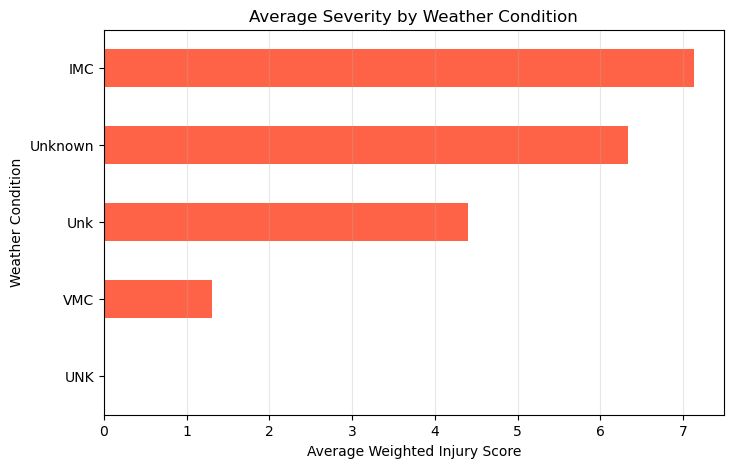

In [126]:
# Group the data by weather condition.
# Calculate the average WeightedInjury for each weather category.
# Sort the result from highest to lowest severity to highlight riskier conditions.
weather_risk = (
    df20.groupby("Weather.Condition")["WeightedInjury"]
    .mean()
    .sort_values(ascending=False)
)

# Create a horizontal bar chart for easier comparison.
plt.figure(figsize=(8,5))
weather_risk.plot(kind="barh", color="tomato")

# Add a descriptive title.
plt.title("Average Severity by Weather Condition")

# Label the x-axis to indicate the metric being shown.
plt.xlabel("Average Weighted Injury Score")

# Label the y-axis to indicate the categories.
plt.ylabel("Weather Condition")

# Reverse the order so that the highest severity is at the top of the chart.
plt.gca().invert_yaxis()

# Add a light grid along the x-axis to make the values easier to read.
plt.grid(axis="x", alpha=0.3)

# Show the plot.
plt.show()

#### Weather Conditions and Accident Severity

This chart compares the average severity of aviation accidents under different weather conditions. IMC (Instrument Meteorological Conditions), which typically involve poor visibility and more complex navigation, shows the highest average severity scores by a large margin. This indicates that accidents in IMC are much more likely to involve fatalities or serious injuries compared to those in VMC (Visual Meteorological Conditions). 

The “Unknown” category is also relatively high, which may reflect incomplete reporting or ambiguous weather situations. Overall, this highlights **adverse weather as a major risk factor** that significantly increases accident severity.


### Aircraft category vs. average severity

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/1543379743.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df20.groupby("Aircraft.Category")["WeightedInjury"]


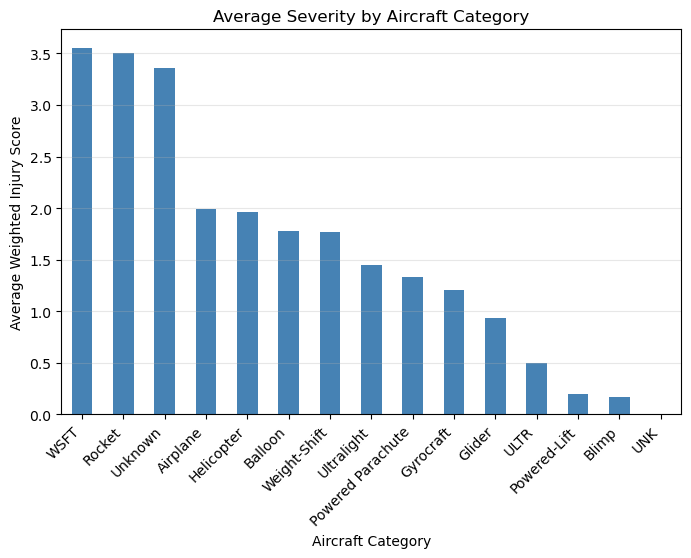

In [127]:
# Group the data by aircraft category.
# Calculate the average WeightedInjury score for each category.
# Sort from highest to lowest severity to identify riskier aircraft types.
aircraft_risk = (
    df20.groupby("Aircraft.Category")["WeightedInjury"]
    .mean()
    .sort_values(ascending=False)
)

# Create a vertical bar chart to compare severity across aircraft categories.
plt.figure(figsize=(8,5))
aircraft_risk.plot(kind="bar", color="steelblue")

# Add a descriptive title.
plt.title("Average Severity by Aircraft Category")

# Label the y-axis to indicate what is being measured.
plt.ylabel("Average Weighted Injury Score")

# Label the x-axis to indicate the categories.
plt.xlabel("Aircraft Category")

# Rotate the x-axis labels for readability if category names are long.
plt.xticks(rotation=45, ha="right")

# Add a light grid along the y-axis to make comparisons easier.
plt.grid(axis="y", alpha=0.3)

# Show the plot.
plt.show()

#### Aircraft Categories and Associated Risks

This chart shows the average severity of accidents across different aircraft categories. Some categories, such as WSFT (Weight-Shift), Rockets, and Airplanes, have relatively high severity scores, while others such as Gliders and Powered-Lift aircraft show lower severity levels. Helicopters also rank moderately high, reflecting their more complex flight dynamics and operational environments.

These differences suggest that **aircraft type plays a meaningful role in the severity of aviation accidents**, with certain categories being more prone to severe outcomes than others. This may relate to differences in speed, maneuverability, flight operations, or typical flight conditions for each category.


### Purpose of flight vs fatal event rate

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/3524824004.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df20.groupby("Purpose.of.flight")["FatalEvent"]


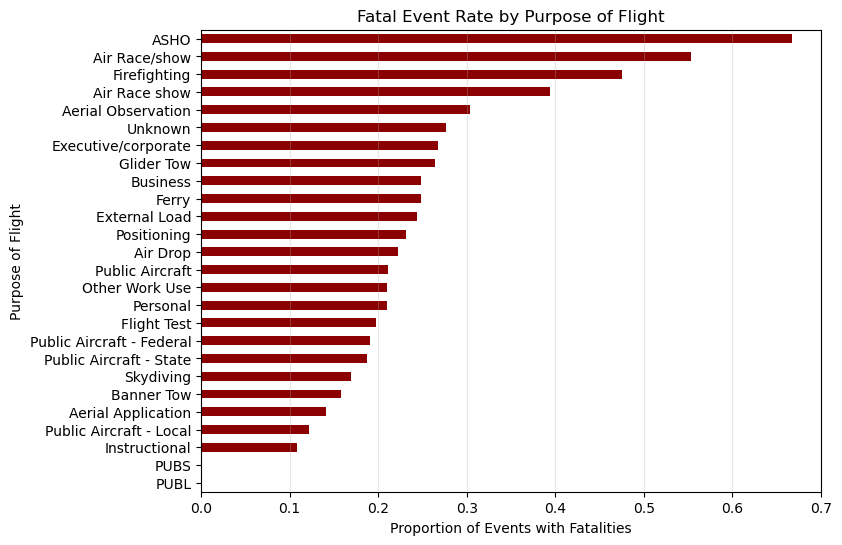

In [128]:

# Group the data by the purpose of flight.
# Calculate the average of the FatalEvent column, which gives the proportion of accidents that were fatal.
# Sort from highest to lowest fatal rate to see which flight purposes are riskier.
fatal_rate_by_purpose = (
    df20.groupby("Purpose.of.flight")["FatalEvent"]
    .mean()
    .sort_values(ascending=False)
)

# Create a horizontal bar chart for clearer comparison.
plt.figure(figsize=(8,6))
fatal_rate_by_purpose.plot(kind="barh", color="darkred")

# Add a descriptive title.
plt.title("Fatal Event Rate by Purpose of Flight")

# Label the x-axis to indicate that the values are proportions (0 to 1).
plt.xlabel("Proportion of Events with Fatalities")

# Label the y-axis to indicate the flight purpose categories.
plt.ylabel("Purpose of Flight")

# Reverse the order so the highest fatal rates appear at the top.
plt.gca().invert_yaxis()

# Add a light grid to the x-axis for readability.
plt.grid(axis="x", alpha=0.3)

# Show the plot.
plt.show()

#### Fatal Event Rates by Flight Purpose

This chart examines how the purpose of a flight relates to the likelihood of an accident being fatal. Activities such as air shows, firefighting, and aerial observation have some of the highest fatal event rates, exceeding 50% in some cases. These operations often occur in challenging conditions (e.g., low altitudes, risky maneuvers, or hazardous environments), which increases the probability of severe accidents.

In contrast, instructional flights and public aircraft operations show much lower fatal rates, likely due to more controlled environments and stricter safety protocols. This analysis reveals **operational purpose as a key risk factor**, with certain specialized or high-risk activities standing out.

### Risk over time by aircraft category

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/2900498615.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top.groupby(["Year", "Aircraft.Category"])["WeightedInjury"]


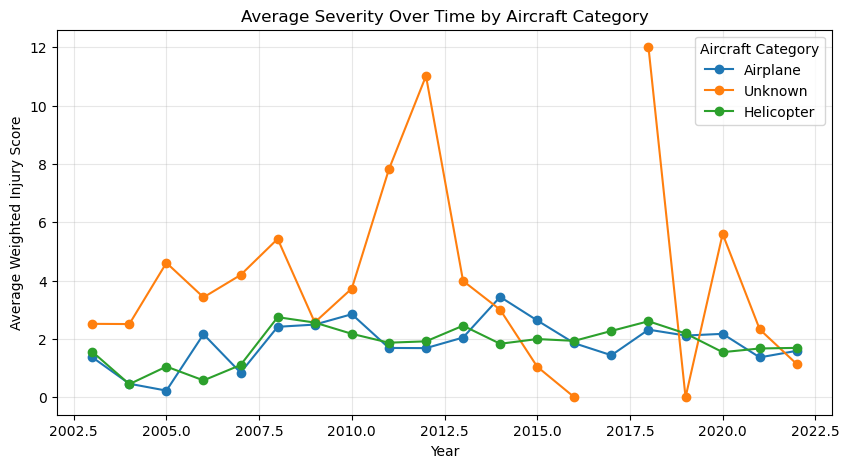

In [129]:
# Count the number of occurrences for each aircraft category.
# Select the top 3 categories with the most data to keep the plot simple and clear.
top_aircraft = df20["Aircraft.Category"].value_counts().head(3).index

# Filter the dataset to keep only those top 3 categories.
df_top = df20[df20["Aircraft.Category"].isin(top_aircraft)]

# Group the filtered data by Year and Aircraft Category.
# Calculate the average severity for each category in each year.
# Reset the index so Year and Aircraft.Category become normal columns for easy plotting.
risk_by_year = (
    df_top.groupby(["Year", "Aircraft.Category"])["WeightedInjury"]
    .mean()
    .reset_index()
)

# Create a line chart that shows each aircraft category's severity trend over time.
plt.figure(figsize=(10,5))

# Loop through each top aircraft category and plot its line separately.
for cat in top_aircraft:
    subset = risk_by_year[risk_by_year["Aircraft.Category"] == cat]
    plt.plot(subset["Year"], subset["WeightedInjury"], marker="o", label=cat)

# Add a descriptive title.
plt.title("Average Severity Over Time by Aircraft Category")

# Label the x-axis to show the timeline.
plt.xlabel("Year")

# Label the y-axis to show the average severity score.
plt.ylabel("Average Weighted Injury Score")

# Add a light grid to help compare trends.
plt.grid(True, alpha=0.3)

# Add a legend to identify each aircraft category line.
plt.legend(title="Aircraft Category")

# Show the plot.
plt.show()

#### Changes in Risk Over Time by Aircraft Category

This line chart tracks how the average severity of accidents has evolved over time for three major aircraft categories: airplanes, helicopters, and gliders. Airplanes and helicopters both show noticeable fluctuations, with several spikes indicating years of higher-severity accidents. Gliders consistently maintain a lower severity level, with relatively stable trends over the 20-year period.

While there is some year-to-year variability, the general patterns suggest that **risk levels have not uniformly improved across all categories**. Airplanes show some reduction in severity toward the later years, but helicopters remain relatively steady, indicating that different aircraft types may face distinct safety challenges over time.

### Weather x flight phase heatmap

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/4082559052.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo_risk = df20.groupby(


TypeError: Image data of dtype object cannot be converted to float

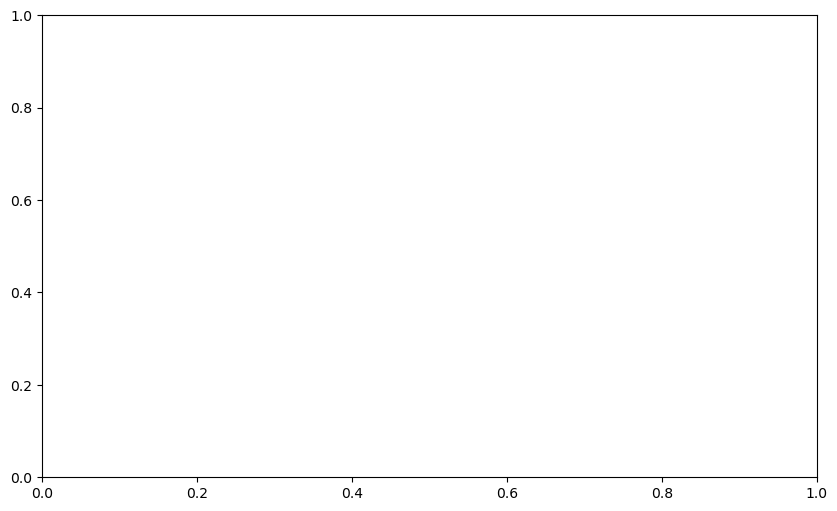

In [131]:
# Group the data by both Weather Condition and Broad Phase of Flight.
# Calculate the average WeightedInjury for each combination.
# Use unstack() to create a table where:
#    - Rows = Weather conditions
#    - Columns = Flight phases
combo_risk = df20.groupby(
    ["Weather.Condition", "Broad.phase.of.flight"]
)["WeightedInjury"].mean().unstack()

# Create a new figure for the heatmap.
plt.figure(figsize=(10,6))

# Use plt.imshow to create a simple heatmap of the combo_risk table.
# The "Reds" colormap uses light colors for low values and dark red for high severity.
plt.imshow(combo_risk, cmap="Reds", aspect="auto")

# Add a descriptive title to explain what this chart shows.
plt.title("Avg Severity: Weather vs Flight Phase")

# Label the x-axis for the flight phases.
plt.xlabel("Broad Phase of Flight")

# Label the y-axis for the weather conditions.
plt.ylabel("Weather Condition")

# Add x-axis tick labels for each flight phase.
plt.xticks(range(len(combo_risk.columns)), combo_risk.columns, rotation=45, ha="right")

# Add y-axis tick labels for each weather condition.
plt.yticks(range(len(combo_risk.index)), combo_risk.index)

# Add a colorbar to show the severity scale.
plt.colorbar(label="Average Weighted Injury Score")

# Adjust layout to make sure labels fit properly.
plt.tight_layout()

# Show the plot.
plt.show()

#### Interaction Between Weather and Flight Phase

This heatmap explores how accident severity varies depending on both the weather condition and the broad phase of flight. Darker shades indicate higher average severity. The combination of IMC weather and critical flight phases—such as landing, approach, and climb—stands out with the highest severity scores. These are typically the most demanding phases of flight, and adverse weather during these times can increase the likelihood of catastrophic outcomes.

In contrast, under VMC conditions, severity levels remain lower and more consistent across phases. This visualization highlights **the interaction between multiple risk factors**—specifically, how poor weather conditions combined with complex flight phases amplify accident severity.

### Summary of Findings for Question 2

Across all five analyses, several clear risk patterns emerge. First, **weather conditions** strongly influence accident severity, with IMC associated with far worse outcomes than VMC. **Aircraft category** is another key factor, as some types (e.g., WSFT, rockets, airplanes) experience more severe accidents than others. **Purpose of flight** also matters: specialized operations like air shows and firefighting show dramatically higher fatal rates compared to training or government flights.

Trends over time reveal that risk is not uniform across categories—while some improvements are visible for airplanes, helicopter accident severity remains more stable. Finally, **combinations of risk factors**, particularly bad weather during critical flight phases, lead to the most severe outcomes.

Together, these findings paint a multidimensional picture of aviation risk: it is shaped not by a single factor, but by the **interaction between weather, aircraft type, operational purpose, and flight phase**, with some risks evolving differently over time. These insights can guide targeted safety measures and policy interventions.

## Question 3: Phase of Flight Analysis (10 points)

Analyze the flight phases to determine if there are any patterns when most accidents/incidents occur.
* Create a detailed breakdown showing which phases of flight most events transpire.
* For each phase of flight, analyze the data across another dimension in the data to draw insights.

         Event.Id Investigation.Type Accident.Number Event.Date  \
0  20001218X45444           Accident      SEA87LA080 1948-10-24   
1  20001218X45447           Accident      LAX94LA336 1962-07-19   
2  20061025X01555           Accident      NYC07LA005 1974-08-30   
3  20001218X45448           Accident      LAX96LA321 1977-06-19   
4  20041105X01764           Accident      CHI79FA064 1979-08-02   
5  20170710X52551           Accident      NYC79AA106 1979-09-17   
6  20001218X45446           Accident      CHI81LA106 1981-08-01   
7  20020909X01562           Accident      SEA82DA022 1982-01-01   
8  20020909X01561           Accident      NYC82DA015 1982-01-01   
9  20020909X01560           Accident      MIA82DA029 1982-01-01   

           Location        Country   Latitude  Longitude Airport.Code  \
0   MOOSE CREEK, ID  United States        NaN        NaN      Unknown   
1    BRIDGEPORT, CA  United States        NaN        NaN      Unknown   
2     Saltville, VA  United States  36.9222

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/2650979385.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



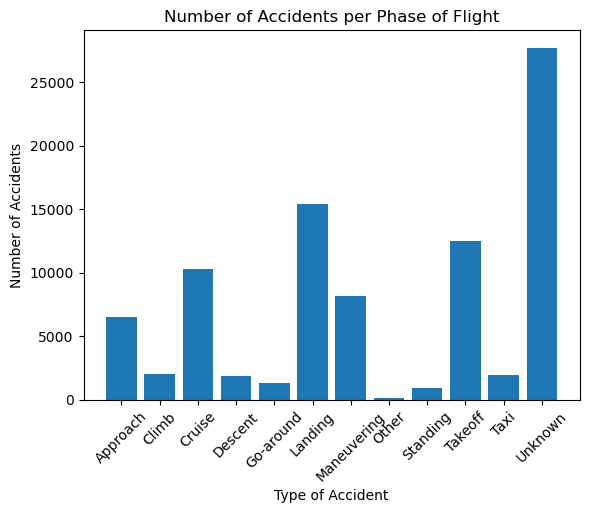

In [144]:
print(aviation_df.head(10))
phase_count = aviation_df.groupby("Broad.phase.of.flight").size()
plt.bar(phase_count.index,phase_count.values)
plt.xlabel("Type of Accident")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Phase of Flight")
plt.xticks(rotation=45)
plt.show()

In [145]:
# Cleans the Injury.Severity Col to make it all consistent
def clean_severity(severity):
    if pd.isna(severity):
        return 'Unknown'
    severity_str = str(severity)
    if severity_str.startswith('Fatal'):
        return 'Fatal'
    return severity_str
aviation_df['Injury.Severity.Clean'] = aviation_df['Injury.Severity'].apply(clean_severity)
print(aviation_df['Injury.Severity.Clean'].value_counts())

Injury.Severity.Clean
Non-Fatal      67357
Fatal          17826
Incident        2219
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64


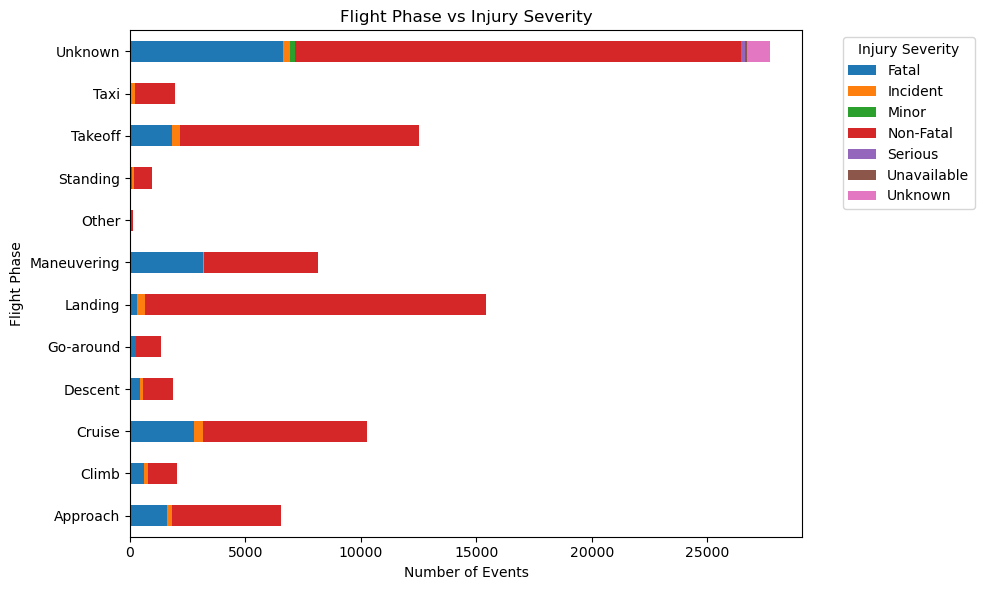

In [146]:
# Stacked Bar Chart
phase_counts = aviation_df['Broad.phase.of.flight'].value_counts()

phase_injury = pd.crosstab(aviation_df['Broad.phase.of.flight'], 
                            aviation_df['Injury.Severity.Clean'])

phase_injury.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Number of Events')
plt.ylabel('Flight Phase')
plt.title('Flight Phase vs Injury Severity')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Question 4: Aircraft Manufacturer Analysis (20 points)

Conduct a fair but thorough comparative analysis of manufacturer and aircraft safety record with respect to accidents and incidents (both fatal and non-fatal) 

### 4.1 Manufacturer Safety Comparison

* Analyze aircraft models with disproportionately high accident or fatality rates. Investigate if certain model aircraft are problematic or if issues are brand-wide
* Create a visualization showing whether these are concentrated in specific phases of flight
* Analyze whether their safety record has improved, declined, or remained stable over time.
  
Note: You can narrow your analysis and discussion to 5 manufacturers. Visualize all results.

In [83]:
standardizations = [
    ('CESSNA', 'CESSNA'),
    ('PIPER', 'PIPER'),
    ('BEECHCRAFT', 'BEECH'),
    ('BEECHCRAFT', 'RAYTHEON'),
    ('CIRRUS', 'CIRRUS'),
    ('MOONEY', 'MOONEY'),
    ('BOEING', 'BOEING'),
    ('AIRBUS', 'AIRBUS'),
    ('BELL', 'BELL'),
    ('ROBINSON', 'ROBINSON'),
]

# Apply each standardization
for standard_name, keyword in standardizations:
    mask = aviation_df['Make'].str.contains(keyword, case=False, na=False)
    aviation_df.loc[mask, 'Make'] = standard_name

print("After standardization:")
print(aviation_df['Make'].value_counts().head(20))

After standardization:
Make
CESSNA               27215
PIPER                14946
BEECHCRAFT            5583
BELL                  3893
BOEING                2833
ROBINSON              1691
MOONEY                1385
Grumman               1094
Hughes                 795
Schweizer              629
Air Tractor            595
Mcdonnell Douglas      526
Aeronca                487
AIRBUS                 476
CIRRUS                 468
Maule                  445
Champion               428
De Havilland           382
Aero Commander         360
Stinson                348
Name: count, dtype: Int64


In [84]:
# Calculates the top 5 Models and gets the data
accident_crash = aviation_df.groupby("Model").size().sort_values(ascending=False)
top_5_models = aviation_df['Model'].value_counts().head(5)
top_5_models_names = top_5_models.index.tolist()
top_5_models_data = aviation_df[aviation_df['Model'].isin(top_5_models_names)]

<Figure size 1200x600 with 0 Axes>

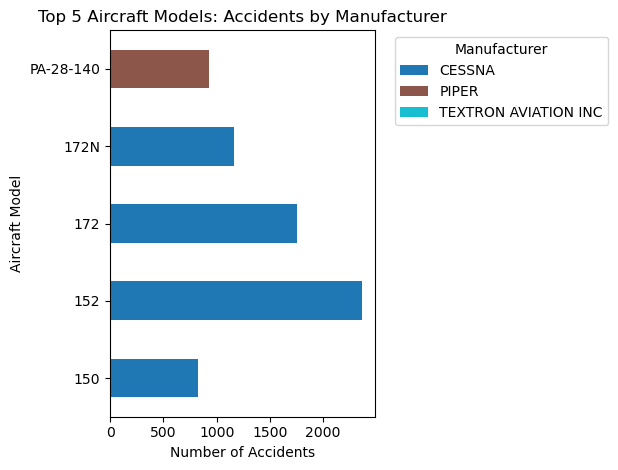

In [85]:
# Stacked bar chart: Top 5 Models by Manufacturer
model_make_crosstab = pd.crosstab(top_5_models_data['Model'], 
                                   top_5_models_data['Make'])

# Create stacked bar chart
plt.figure(figsize=(12, 6))
model_make_crosstab.plot(kind='barh', stacked=True, colormap='tab10')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.title('Top 5 Aircraft Models: Accidents by Manufacturer')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

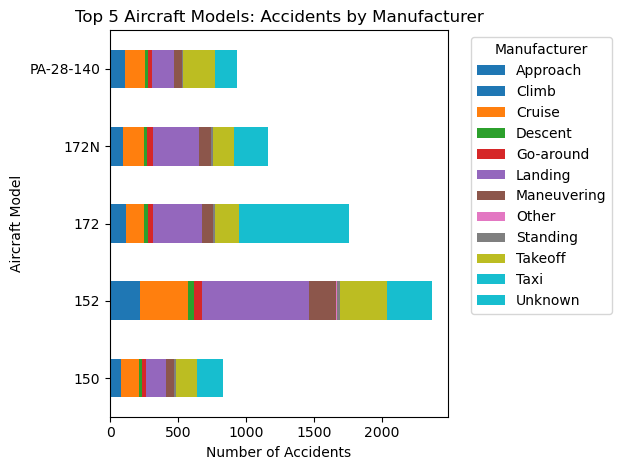

In [86]:
# Stacked bar chart: Top 5 Models by Manufacturer
model_make_crosstab = pd.crosstab(top_5_models_data['Model'], 
                                   top_5_models_data['Broad.phase.of.flight'])

# Create stacked bar chart
plt.figure(figsize=(12, 6))
model_make_crosstab.plot(kind='barh', stacked=True, colormap='tab10')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.title('Top 5 Aircraft Models: Accidents by Manufacturer')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.2 Investigate aircraft complexity and safety

* Use number of engines and engine type as complexity indicators
* Visualize whether more complex aircraft have different accident patterns
* Compare accident severity across at least two aircraft categories

In [87]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [88]:
print(aviation_df["Engine.Type"].value_counts().head(20))

Engine.Type
Reciprocating      69530
Unknown             9147
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64


In [89]:
print(aviation_df["Aircraft.Category"].value_counts())

Aircraft.Category
Unknown              56616
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64


In [99]:
top_5_categories = aviation_df['Aircraft.Category'].value_counts().head(5).index
df_top5 = aviation_df[aviation_df['Aircraft.Category'].isin(top_5_categories)]
df_top5

Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States        NaN        NaN      Unknown   
1       BRIDGEPORT, CA  United States        NaN        NaN      Unknown   
2        Saltville, VA  United States  36.922223 -81.878056      Unknown   
3           EUREKA, CA  United States        NaN        NaN      Unknown   
4           Canton, OH  United States        NaN        NaN      Unknown   
...                ...            ...        ...        ...          ...   
88884    Annapolis, MD  United States        NaN        NaN      Unknown   
88885      Hampton, NH  United States        NaN        NaN      Unknown   
88886       Payson, AZ  United States        NaN        NaN          PAN   
88887       Morgan, UT  United States        NaN        NaN      Unknown   
88888       Athens, GA  United States        NaN        NaN      Unknown   

      Airport.Name  ...         Air.carrier Total.Fatal.Injuries  \
0          Unknown  ...             Unknown                    2   
1          Unknown  ...             Unknown                    4   
2          Unknown  ...             Unknown                    3   
3          Unknown  ...             Unknown                    2   
4          Unknown  ...             Unknown                    1   
...            ...  ...                 ...                  ...   
88884      Unknown  ...             Unknown                    0   
88885      Unknown  ...             Unknown                    0   
88886       PAYSON  ...             Unknown                    0   
88887      Unknown  ...  MC CESSNA 210N LLC                    0   
88888      Unknown  ...             Unknown                    0   

      Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                          0                    0               0   
1                          0                    0               0   
2                          0                    0               1   
3                          0                    0               0   
4                          2                    0               0   
...                      ...                  ...             ...   
88884                      1                    0               0   
88885                      0                    0               0   
88886                      0                    0               1   
88887                      0                    0               0   
88888                      1                    0               1   

      Weather.Condition Broad.phase.of.flight   Report.Status  \
0                   UNK                Cruise  Probable Cause   
1                   UNK               Unknown  Probable Cause   
2                   IMC                Cruise  Probable Cause   
3                   IMC                Cruise  Probable Cause   
4                   VMC              Approach  Probable Cause   
...                 ...                   ...             ...   
88884           Unknown               Unknown         Unknown   
88885           Unknown               Unknown         Unknown   
88886           

/var/folders/bb/3_ttlmmn3gj0nwmdbrszt_rr0000gn/T/ipykernel_56956/1111317528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  complexity_stats = aviation_df.groupby(['Complexity', 'Aircraft.Category']).agg({


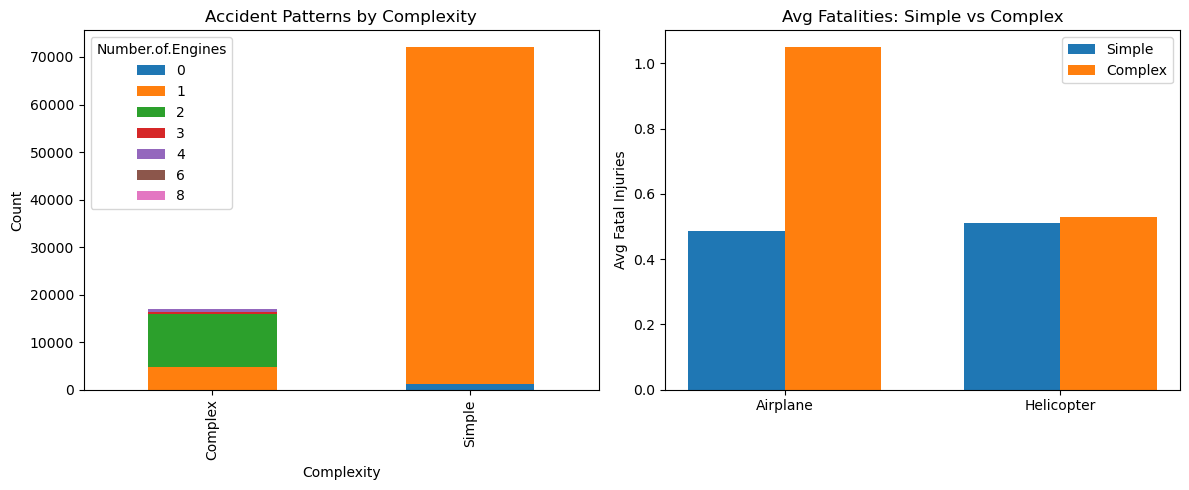

In [100]:
aviation_df['Complexity'] = 'Simple'
aviation_df.loc[(aviation_df['Number.of.Engines'] > 1) | 
                (aviation_df['Engine.Type'].str.contains('Turbo')), 'Complexity'] = 'Complex'

# Group and calculate fatal rates
complexity_stats = aviation_df.groupby(['Complexity', 'Aircraft.Category']).agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': lambda x: (x > 0).mean() * 100
}).round(1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart 1: Accident patterns by complexity
complexity_counts = aviation_df.groupby(['Complexity', 'Number.of.Engines']).size().unstack()
complexity_counts.plot(kind='bar', ax=ax1, stacked=True)
ax1.set_title('Accident Patterns by Complexity')
ax1.set_ylabel('Count')

# Bar chart 2: Severity comparison
categories = ['Airplane', 'Helicopter']
simple_fatal = [aviation_df[(aviation_df['Complexity']=='Simple') & 
                            (aviation_df['Aircraft.Category']==cat)]['Total.Fatal.Injuries'].mean() 
                for cat in categories]
complex_fatal = [aviation_df[(aviation_df['Complexity']=='Complex') & 
                            (aviation_df['Aircraft.Category']==cat)]['Total.Fatal.Injuries'].mean() 
                 for cat in categories]

x = np.arange(len(categories))
width = 0.35

ax2.bar(x - width/2, simple_fatal, width, label='Simple')
ax2.bar(x + width/2, complex_fatal, width, label='Complex')

ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.set_title('Avg Fatalities: Simple vs Complex')
ax2.set_ylabel('Avg Fatal Injuries')
ax2.legend()

plt.tight_layout()
plt.show()

The two grouped bar chart graphs depict the complexity of the accident patterns. The complexity was calcualted using the number of engines per aircraft and the type of aircraft, and we can see in the left graph that around 1/4 of all incidents identify as being with complex aircrafts. The majority of complex aircrafts seem to have 2 engines, with a miniscule amount being 4+. 

Using these defined complexity indicators, the average fatalities was computed for the two most common aircraft being helicopter and airplane. While helicopter complexity versus simple seems to have no effect on the accident, complex airplanes have over 1 average fatality per flight comapre to the 0.5 for simple. Based off this data, our recommendation would be to steer away from heavily producing or using complex aircrafts, specifically airplanes.

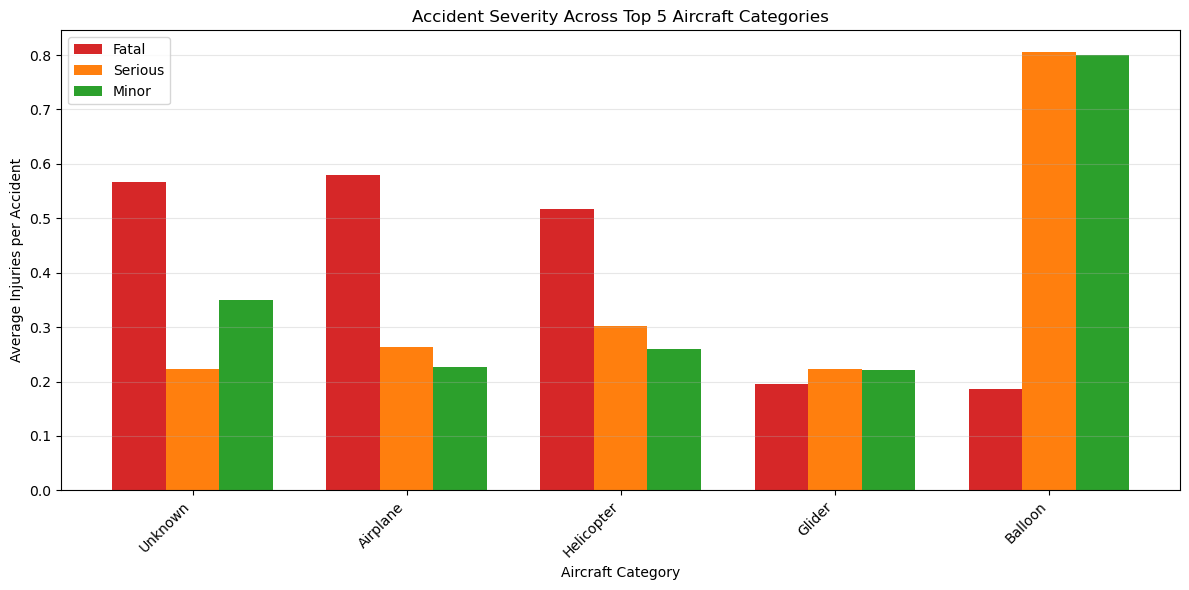

In [106]:
# Get top 5 aircraft categories
top_5_categories = aviation_df['Aircraft.Category'].value_counts().head(5).index
df_top5 = aviation_df[aviation_df['Aircraft.Category'].isin(top_5_categories)]

# Calculate severity metrics
severity_data = []
for category in top_5_categories:
    cat_data = df_top5[df_top5['Aircraft.Category'] == category]
    severity_data.append({
        'Category': category,
        'Fatal': cat_data['Total.Fatal.Injuries'].mean(),
        'Serious': cat_data['Total.Serious.Injuries'].mean(),
        'Minor': cat_data['Total.Minor.Injuries'].mean(),
        'Count': len(cat_data)
    })

severity_df = pd.DataFrame(severity_data)

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(top_5_categories))
width = 0.25

ax.bar(x - width, severity_df['Fatal'], width, label='Fatal', color='#d62728')
ax.bar(x, severity_df['Serious'], width, label='Serious', color='#ff7f0e')
ax.bar(x + width, severity_df['Minor'], width, label='Minor', color='#2ca02c')

ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Average Injuries per Accident')
ax.set_title('Accident Severity Across Top 5 Aircraft Categories')
ax.set_xticks(x)
ax.set_xticklabels(top_5_categories, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Grouped bar chart depicts the accident severeity across the top 5 aircraft categories, being Unknown, airplane, helicopter, glider, and balloon. While we don't reasoanbly ahve anough data to source what the unknown ones are, it's reasonable to assume they are a combination of the other 4 plus some others. A key trend to notice is that over 50% of airplane and helicopter injuries are fatal, questioning their safety procedures. This also supports the idea that unknown would be made up of mostly airplane and helicopter since they have similar fatality proportions.

On the other hand glider does not suffer many injuries across the board, while balloon has a significant proportion of minor and serious injuries. Our reccomendation would be to enforce and improve safety regulations on airplanes and helicopters to reduce fatalities and potentially add some precautions for balloons.

## Question 5: Geographic and Temporal Patterns - "When and Where?" (20 points)

### 5.1: Create a geographic outlook of the data.

* Create a map showing accident density by state/region
* Identify and visualize "persistent danger zones" - locations with consistent accidents over time

In [132]:
# printing to see how it's formatted. Latitude and longitude
# columns have a lot of missing values so we can't rely on that.
print(aviation_df['Location'].unique()) 

<StringArray>
[           'MOOSE CREEK, ID',             'BRIDGEPORT, CA',
              'Saltville, VA',                 'EUREKA, CA',
                 'Canton, OH',                 'BOSTON, MA',
                 'COTTON, MN',                'PULLMAN, WA',
           'EAST HANOVER, NJ',           'JACKSONVILLE, FL',
 ...
                 'Dortmund, ',             'PONTA GROSSA, ',
             'Fox Island, NY',                  'Kildare, ',
         'Rancho Cordova, CA',               'Kellyton, AL',
 'Happy Valley-Goose Bay, OF',             'San Manual, AZ',
           'Auburn Hills, MI',                'Brasnorte, ']
Length: 27758, dtype: string


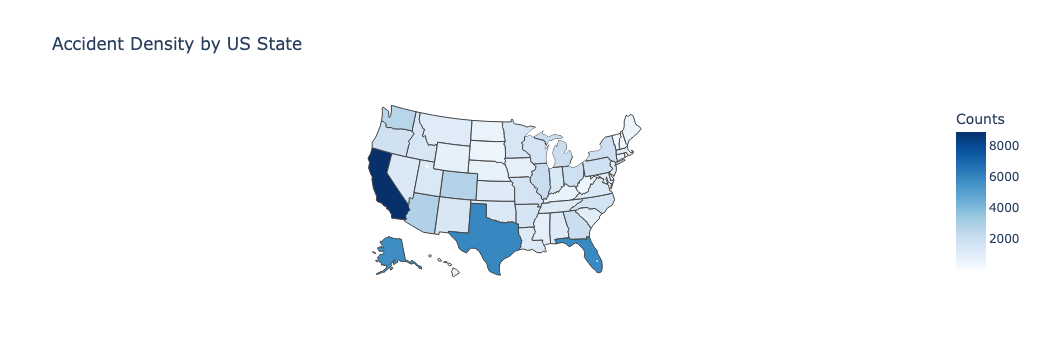

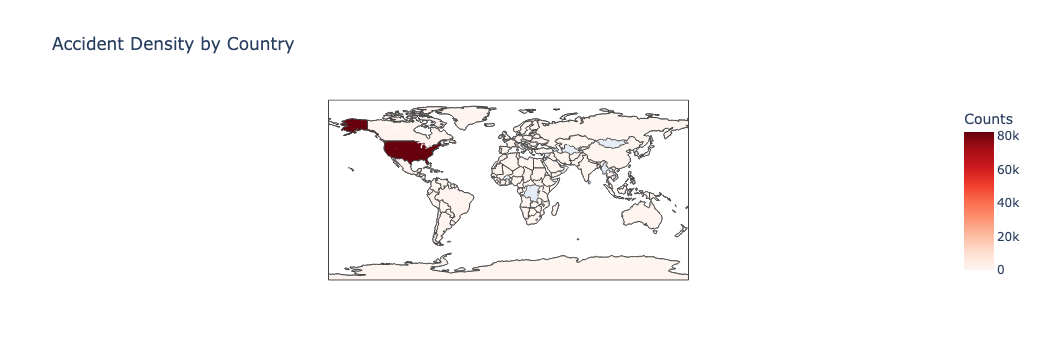

In [133]:
import plotly.express as px

# Referencing this: https://plotly.com/python/choropleth-maps/
# this separates the locations into City, State pairs
parts = aviation_df['Location'].str.split(',', n=1, expand=True)
aviation_df['State_Abbrev'] = parts[1].str.strip()

# we want to plot by state for the USA, and then by region (aka
# country) for areas outside of the USA
nonUSCountries = aviation_df[aviation_df['Country'] != 'USA']

# counting total accidents by state
state_counts = (
    aviation_df.groupby('State_Abbrev', dropna=True)
    .size()
    .reset_index(name='Counts')
)

# counting total accidents by country
country_counts = (
    nonUSCountries.groupby('Country', dropna=True)
    .size()
    .reset_index(name='Counts')
)

usa_map = px.choropleth(
    state_counts,
    locations='State_Abbrev',    
    locationmode='USA-states',  
    color='Counts',       
    color_continuous_scale='Blues',
    title='Accident Density by US State'
)

usa_map.update_geos(
    scope='usa',
    projection_type='albers usa' # including alaska + hawaii
)
usa_map.show()

abroad_map = px.choropleth(
    country_counts,
    locations='Country',    
    locationmode='country names',  
    color='Counts',       
    color_continuous_scale='Reds',
    title='Accident Density by Country'
)

abroad_map.show()

#### Identify and visualize "persistent danger zones" - locations with consistent accidents over time

Although there are some countries with a decent number of accidents such as Brazil with 374 recorded accidents, most of the accidents are concentrated in the USA, with around 82k recorded accidents. It seems that within the USA, California has the highest rate of accidents over time with 8857 recorded accidents. Texas, Florida, and Alasks follow with the three states having 5913, 5825, and 5672 recorded accidents respectively. This suggests that the USA, and especially California, Texas, Florida, and Alaska seem to be persistent danger zones.

### 5.2: Investigate seasonal and temporal patterns:

* Use a calendar heatmap to show when accidents occur most frequently. Are there seasonal accident patterns?

Insight Goal: Identify when and where additional safety measures or restrictions might be needed.

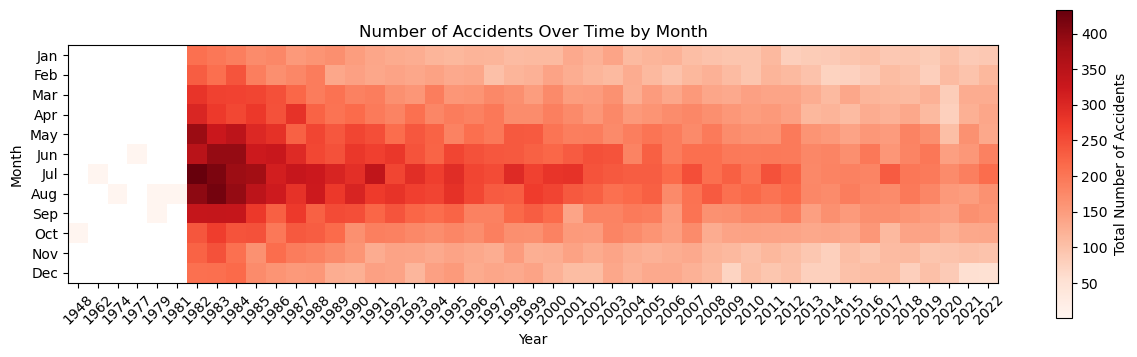

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

aviation_df['Years'] = aviation_df['Event.Date'].dt.year
aviation_df['Months'] = aviation_df['Event.Date'].dt.month

monthly_counts = (
    aviation_df.groupby(['Months', 'Years'])
    .size()
    .reset_index(name='Counts')
)

# we want to change the dataframe into something matplotlib can
# understand, so an array where the rows are months and cols are years
heatmap_data = (
    monthly_counts.pivot(index='Months', columns='Years', values='Counts')
)

plt.figure(figsize=(15, 4))
plt.imshow(heatmap_data, cmap='Reds')
plt.colorbar(label='Total Number of Accidents')
plt.xticks(
    ticks=range(len(heatmap_data.columns)), 
    labels=heatmap_data.columns, 
    rotation=45)
plt.yticks(
    ticks=range(12), 
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.title('Number of Accidents Over Time by Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# referenced these two:
# Stack overflow: Matplotlib and Numpy - Create a calendar heatmap
# Stack overflow: Plotting a 2D heatmap

#### Analysis

It seems that over time, the total number of accidents has decreased which is likely due to advancing technologies and safer aircrafts. In terms of seasonal patterns, it seems that the May to September months tend to have a higher number of accidents due to their blocks consistently being darker (indicating more accidents). This indicates that the mid-Spring, Summer, and early-Fall months tend to have a higher rate of accidents, with most of those concentrated in the Summer months from June to August. One reason could be because more people tend to travel in the Summer. This business could lead to a higher probability of accidents or more stress placed on pilots and airport systems.

## Question 6: Open-Ended Analysis (10 points)

* Perform a comparative analysis of your choice. Ensure that you provide accurate information and compelling visual storytelling with the data. Explain all steps and justify your analysis based on the supporting data.
* Create at least 5 visualizations that tell a complete story about your chosen comparison.

In [14]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Analysis Question: How does an amateur aircraft compare to a professionals building one? One can assume the safety of a professional one is better from anacedotal experience and just common sense, but how big is the gap really? Does less certified really equate less afe? First we'll analyze basic logistical questions, such as the proportion of amateur to certified aircrafts, then answer the safety of each aircraft, and finally how well do they perform in adverse weather conditions.

In [15]:
aviation_df["Investigation.Type"].unique

<bound method Series.unique of 0        Accident
1        Accident
2        Accident
3        Accident
4        Accident
           ...   
88884    Accident
88885    Accident
88886    Accident
88887    Accident
88888    Accident
Name: Investigation.Type, Length: 88889, dtype: category
Categories (2, object): ['Accident', 'Incident']>

In [16]:
aviation_df["Investigation.Type_Numeric"] = aviation_df['Investigation.Type'].map({
    'Accident': 1,
    'Incident': 2
})

In [17]:
amateur_built = aviation_df[aviation_df['Amateur.Built'] == 'Yes']
certified_built = aviation_df[aviation_df['Amateur.Built'] == 'No']
certified_built.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Investigation.Type_Numeric'],
      dtype='object')

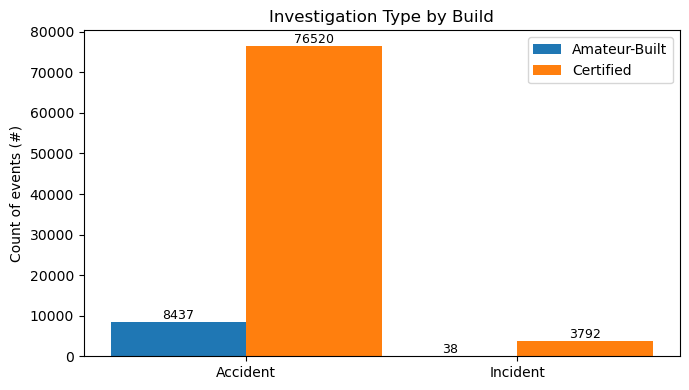

In [111]:
incident_types = ['Accident', 'Incident']
am_counts = amateur_built['Investigation.Type'].value_counts().reindex(incident_types, fill_value=0)
cf_counts = certified_built['Investigation.Type'].value_counts().reindex(incident_types, fill_value=0)

x = np.arange(len(types))
w = 0.5

fig, ax = plt.subplots(figsize=(7,4))
ax.bar(x - w/2, am_counts.values, width=w, label='Amateur-Built')
ax.bar(x + w/2, cf_counts.values, width=w, label='Certified')

ax.set_xticks(x); ax.set_xticklabels(types)
ax.set_ylabel('Count of events (#)')
ax.set_title('Investigation Type by Build')
for i, v in enumerate(am_counts.values):
    ax.text(x[i]-w/2, v, f'{v}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(cf_counts.values):
    ax.text(x[i]+w/2, v, f'{v}', ha='center', va='bottom', fontsize=9)
ax.legend()

plt.tight_layout()
plt.show()

Our first visualization shows the distribution of investigation type by build, including the amount of events per aircraft type. There are significantly more certified than amateur aircrafts, but a difference in proportion of accident to incident, with certified having around 4.7% being incident, while amateur aircrafts have only a 0.4% incident rate, implying amateur aircrafts can be more dangerous.

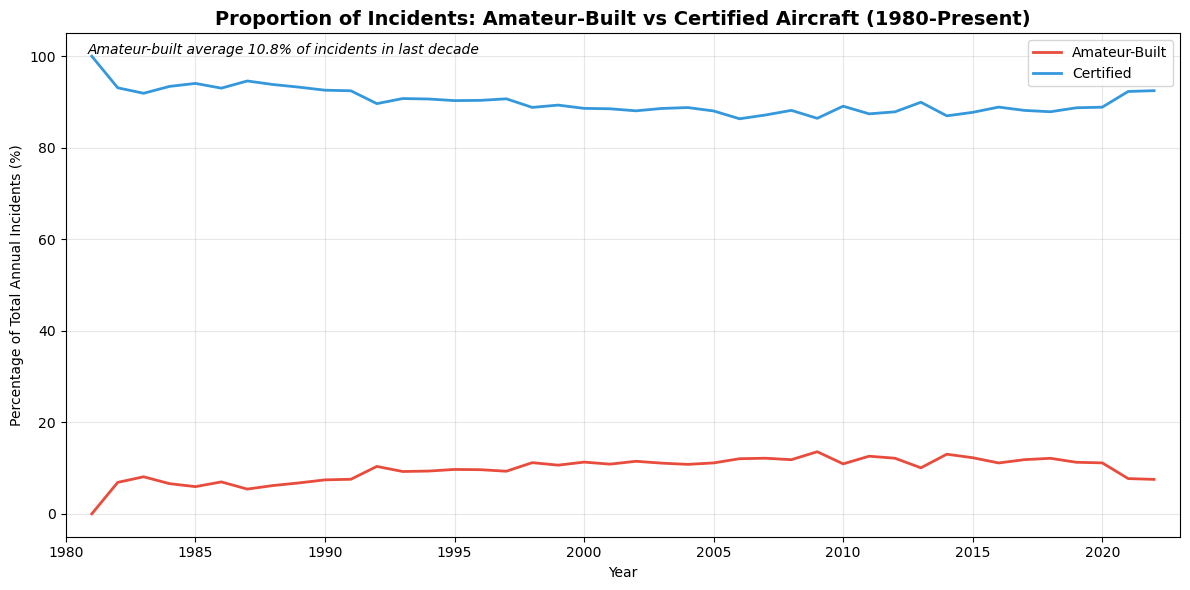

In [143]:
# Visualization 2: Amateur-Built vs Certified Incidents over time
# Calculate yearly totals for ALL aircraft
yearly_totals = aviation_df.groupby(aviation_df['Event.Date'].dt.year).size()

# Calculate yearly counts for each type
amateur_yearly = amateur_built.groupby(amateur_built['Event.Date'].dt.year).size()
certified_yearly = certified_built.groupby(certified_built['Event.Date'].dt.year).size()

# Convert to percentages
amateur_pct = (amateur_yearly / yearly_totals * 100).fillna(0)
certified_pct = (certified_yearly / yearly_totals * 100).fillna(0)

# Filter for years where amateur-built actually appear (after 1980)
start_year = 1980
end_year = 2023
amateur_pct = amateur_pct[amateur_pct.index >= start_year]
certified_pct = certified_pct[certified_pct.index >= start_year]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(amateur_pct.index, amateur_pct.values, label='Amateur-Built', linewidth=2, color='#e74c3c')
ax.plot(certified_pct.index, certified_pct.values, label='Certified', linewidth=2, color='#3498db')

ax.set_title('Proportion of Incidents: Amateur-Built vs Certified Aircraft (1980-Present)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Total Annual Incidents (%)')
ax.set_xlim(start_year, end_year)
ax.legend()
ax.grid(True, alpha=0.3)

# Add note with actual average
recent_avg = amateur_pct.tail(10).mean()
ax.text(0.02, 0.98, f'Amateur-built average {recent_avg:.1f}% of incidents in last decade',
        transform=ax.transAxes, fontsize=10, va='top', style='italic')

plt.tight_layout()
plt.show()

This graph represents the proportion of amateur vs certified aircrafts incidents over time. In general, neither are improving or decreasing heavily over time, both hovering around 90% and 10% over time respectively. While overall incidents have gone down over time as we note from the previous questions, neither amateur or certified aircrafts are reducing specifically, their percentage is just proportional to their share of total aircrafts. One might expect certified to go down and amateur increased as engineering gets better, but not according to the data.

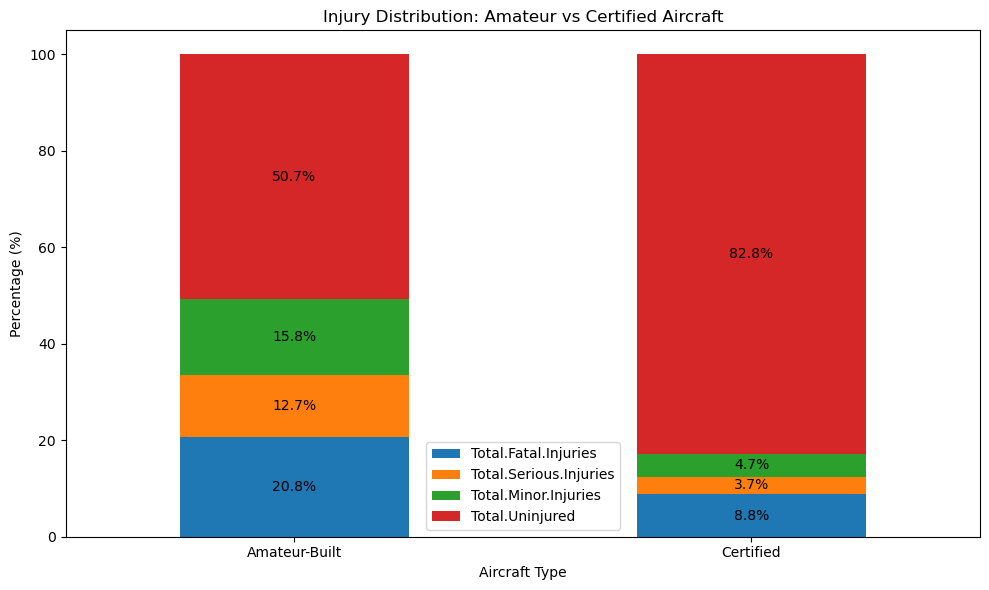

In [19]:
# Visualization 3: Injury distribution
injury_data = pd.DataFrame({
    'Amateur-Built': amateur_built[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                                   'Total.Minor.Injuries', 'Total.Uninjured']].sum(),
    'Certified': certified_built[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                 'Total.Minor.Injuries', 'Total.Uninjured']].sum()
})

injury_pct = injury_data.div(injury_data.sum()) * 100

# Plot
ax = injury_pct.T.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Aircraft Type')
ax.set_ylabel('Percentage (%)')
ax.set_title('Injury Distribution: Amateur vs Certified Aircraft')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

Analysis: As we can see, the injury distribution of amateur vs certified aircrafts do differ significantly. Total injuries and fatalies are significantly more on amateur-built aircrafts, with almost half of all incidents haveing some minor, serious, or fatal injuries. Nearly 20% of all amateur-built aircraft incidents are fatal, much larger than the 8.8% fatality rate of certified aircrafts. While it is important to note that certified aircrafts have much more data, so the amateur-built insights might be slightly inaacurate.

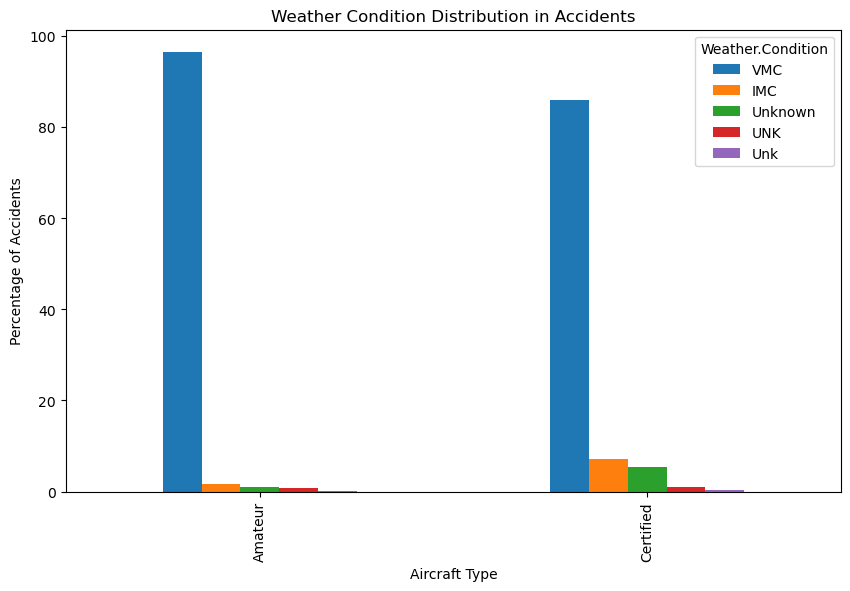

In [117]:
# Visualization 4: How do amateur vs certified aircrafts compare in harsh weather conditions
weather_comparison = pd.crosstab(
    [amateur_built['Weather.Condition'], certified_built['Weather.Condition']], 
    [amateur_built['Amateur.Built'], certified_built['Amateur.Built']], 
    normalize='columns'
) * 100
                     
# Create grouped bar chart
weather_df = pd.DataFrame({
    'Amateur': amateur_built['Weather.Condition'].value_counts(normalize=True) * 100,
    'Certified': certified_built['Weather.Condition'].value_counts(normalize=True) * 100
})

ax = weather_df.T.plot(kind='bar', figsize=(10, 6))
ax.set_title('Weather Condition Distribution in Accidents')
ax.set_xlabel('Aircraft Type')
ax.set_ylabel('Percentage of Accidents')
plt.show()

This grouped bar graph explores the weather condition during proportion of accidents. In general, both amateur and certified aircrafts succumb to the most incidents during VMC, or when pilots only use visual reference. Amateur-built aircrafts are proportionally around 95% incidents in VMC conditions compare to certified aircrafts, where around 15% is made up of various categories like IMC and Unknown.

This distribution of weather conditions suggests that amateur aircrafts might need to declare vision as IMC more often so the pilots would be able to use navigational tools. Our recommendation is too implement higher standards for what qualifies as VMC and IMC conditions.

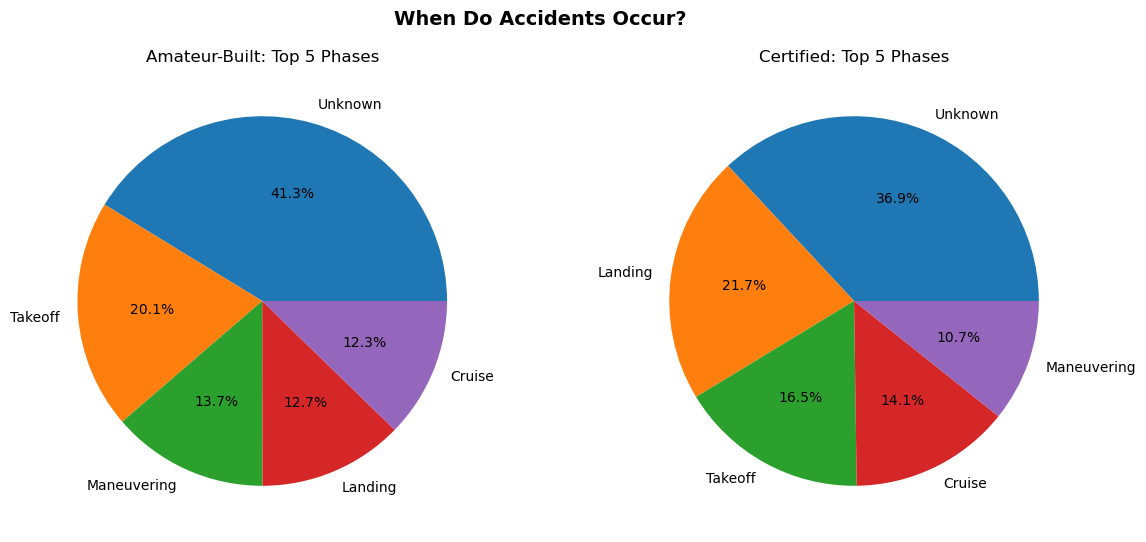

In [50]:
# Visualization 5:
phase_amateur = amateur_built['Broad.phase.of.flight'].value_counts().head(5)
phase_certified = certified_built['Broad.phase.of.flight'].value_counts().head(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(phase_amateur.values, labels=phase_amateur.index, autopct='%1.1f%%')
axes[0].set_title('Amateur-Built: Top 5 Phases')

axes[1].pie(phase_certified.values, labels=phase_certified.index, autopct='%1.1f%%')
axes[1].set_title('Certified: Top 5 Phases')

plt.suptitle('When Do Accidents Occur?', fontsize=14, fontweight='bold')
plt.show()

Finally, this pie chart depicts the difference in phase of flight that these incidents do occur. Similar to previous examples, Unknown remains the top category for both, but there are key distinctions to notice. Amateur aircrafts have nearly 4% more accidents in takeoff, but over 7% less injuries in landing, suggesting both aircrafts have areas in improve. Landing for certified commercial flights will naturally be harder hoever, simply due to the fact of more people and a heavier aircraft. 

Other than that, Both cruise and manuvering seem to have similar rates for incidents. Our final answer for this mini-analysis of are amateur or certified aircrafts safer would be that certified aircrafts are much safer, albeit not perfect. Our recommendation would be to increase safety regulations on amateur flights and even getting it certified by the FAA.

### Question 7: Summary (5 points)
Summarize the overall analysis and share THREE (3) key findings, 2 critical recommendations and your aviation safety assessment.

Note:
* Ensure that all questions have supporting visualizations.
* Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
* Use markdown cells to explain your observations about the data.
* Include the names of all teammates on all submissions
* Ensure that your Python code is in a code cell and that it executes without errors.